In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('ElectricCarData_Clean_Me.csv')

In [13]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [14]:
df.shape

(102, 15)

In [15]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [16]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [17]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'

In [18]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,Tesla-Model 3 Long Range Dual Motor
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,Volkswagen-ID.3 Pure
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,Polestar-2
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,BMW-iX3
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,Honda-e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,Nissan-Ariya 63kWh
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050,Audi-e-tron S Sportback 55 quattro
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000,Nissan-Ariya e-4ORCE 63kWh
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000,Nissan-Ariya e-4ORCE 87kWh Performance


#Data Visualization

---



###count plot for *powertrain*

In [21]:
def power_train(dataframe): 
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)


* ### Count plot for body style

In [25]:
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

In [26]:
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'Range_Km' , data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

In [27]:
def range_batterypack(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [28]:
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'AccelSec', data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

In [29]:
def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [30]:
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

In [31]:
def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'FastCharge_KmH' , data = dataframe, color = 'lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabbel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

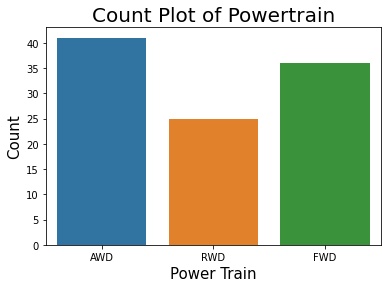

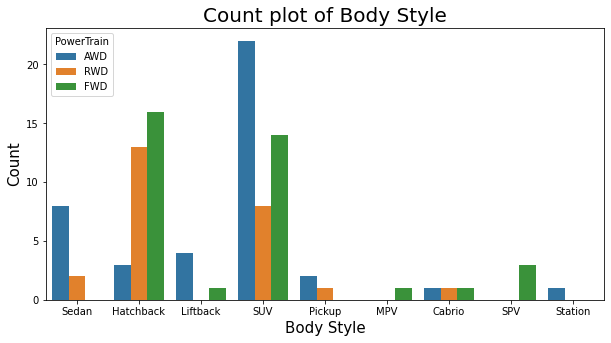

In [32]:
# Count Plots
power_train(df)
bodystyle(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


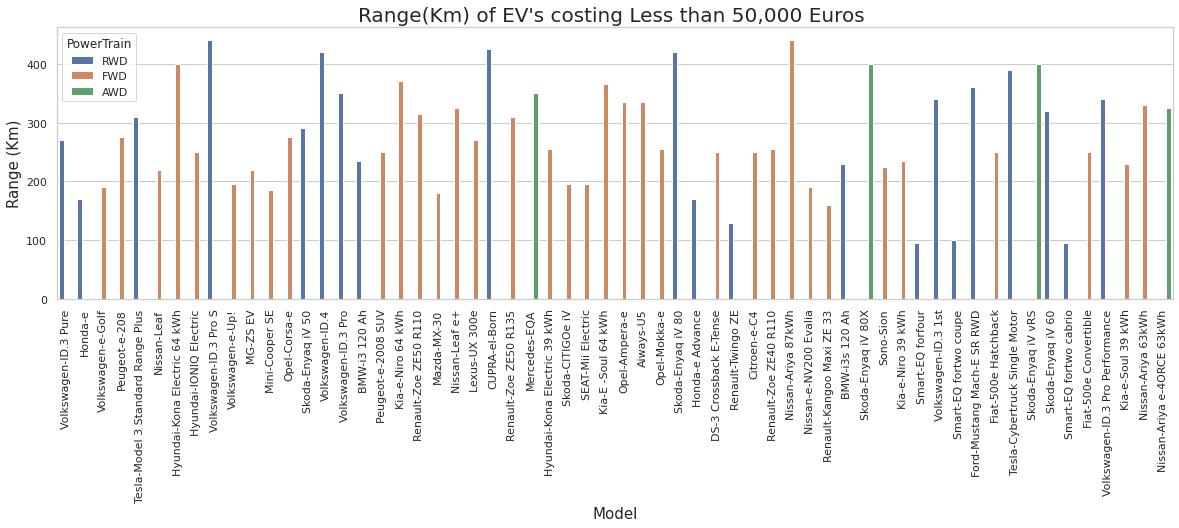

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


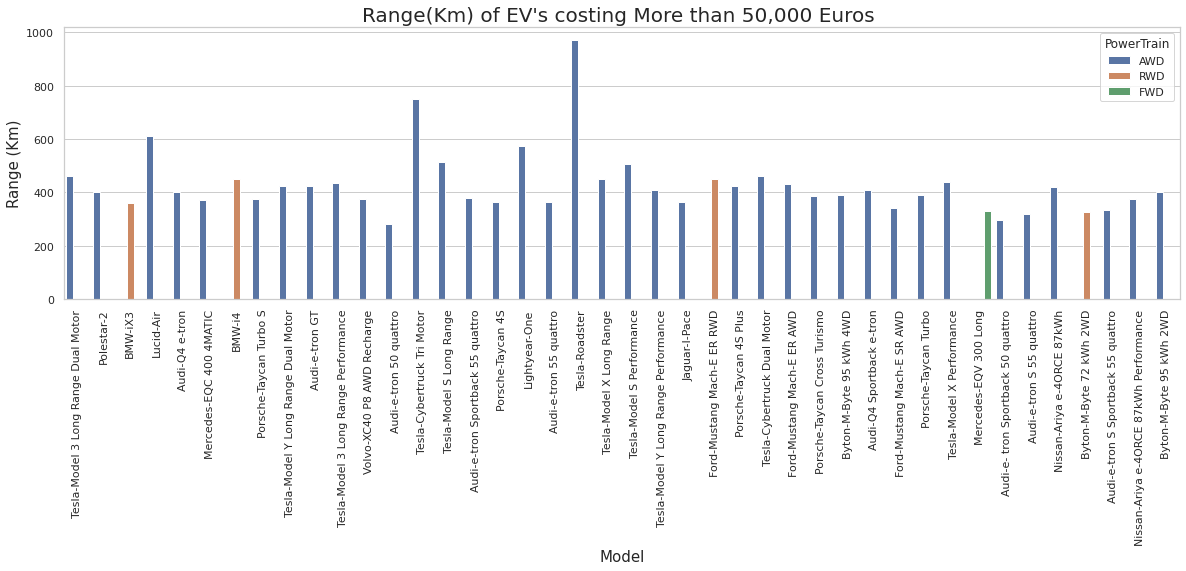

In [33]:
range(df_1, t1)
range(df_2, t2)

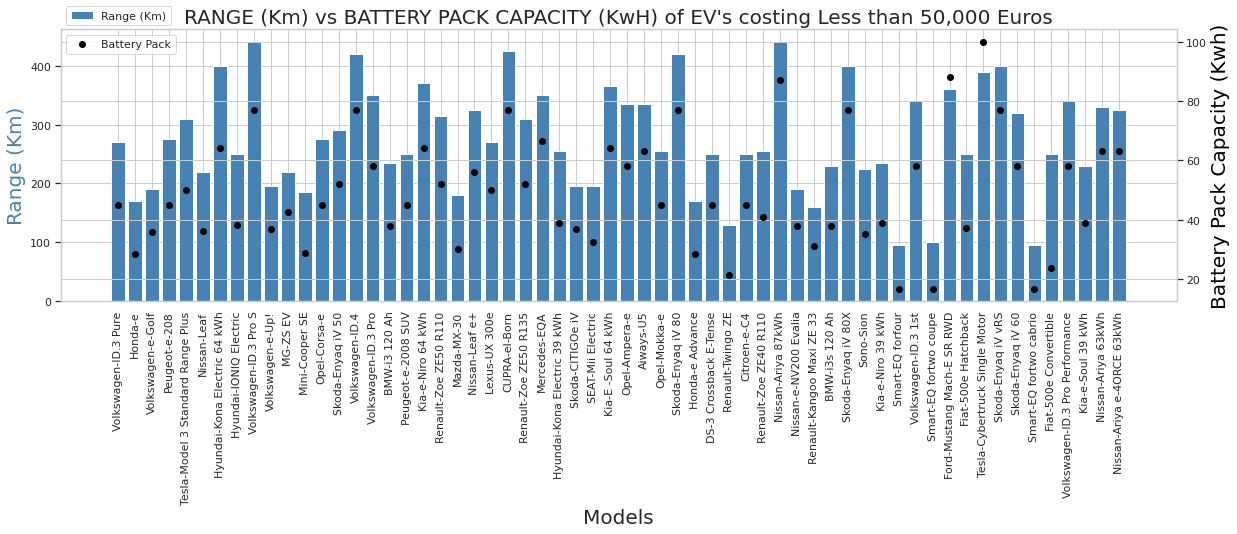

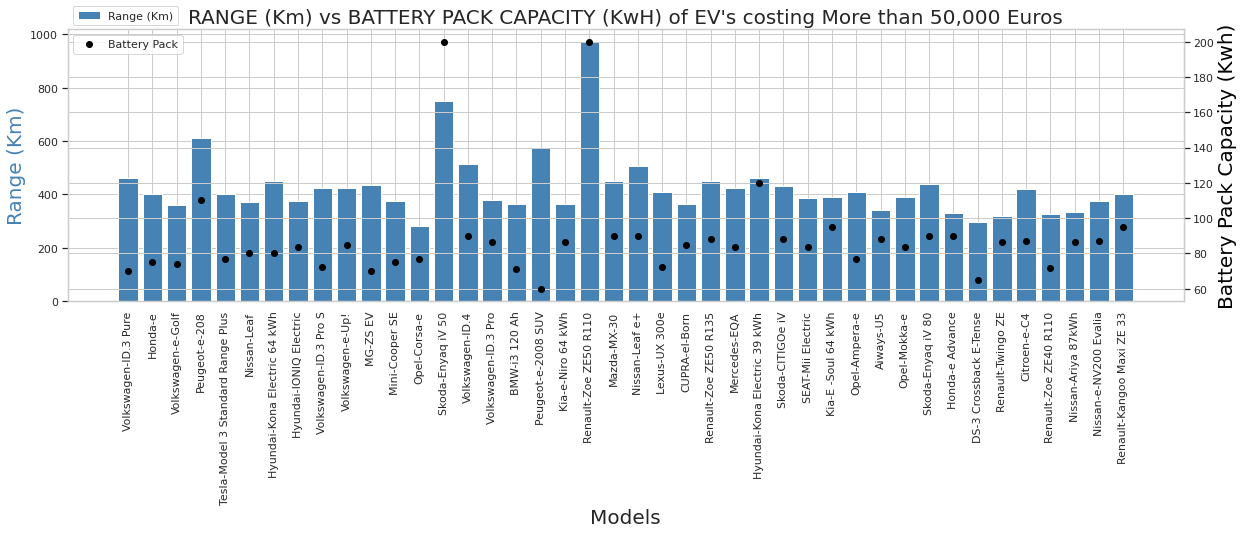

In [34]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


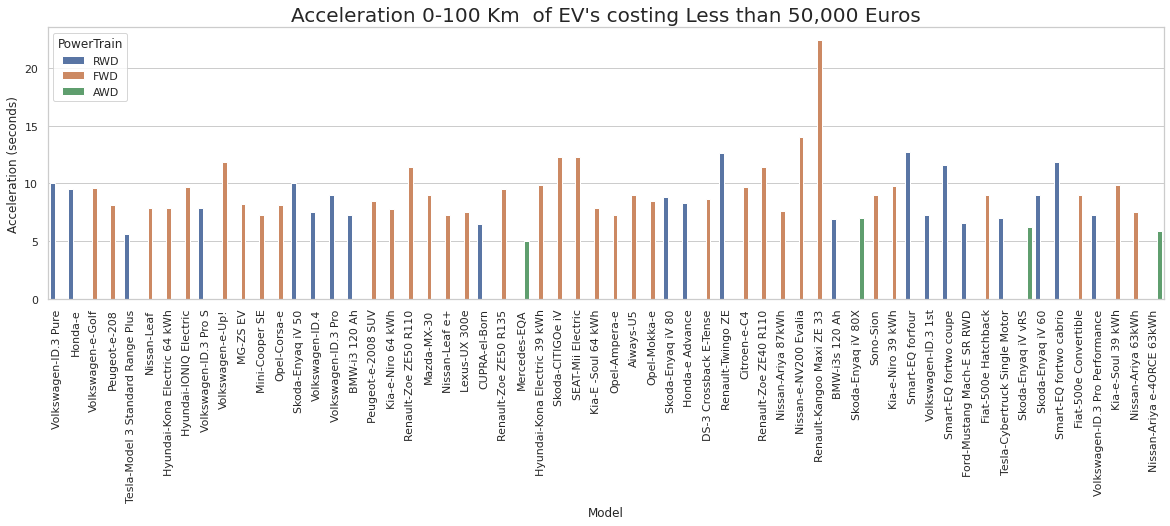

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


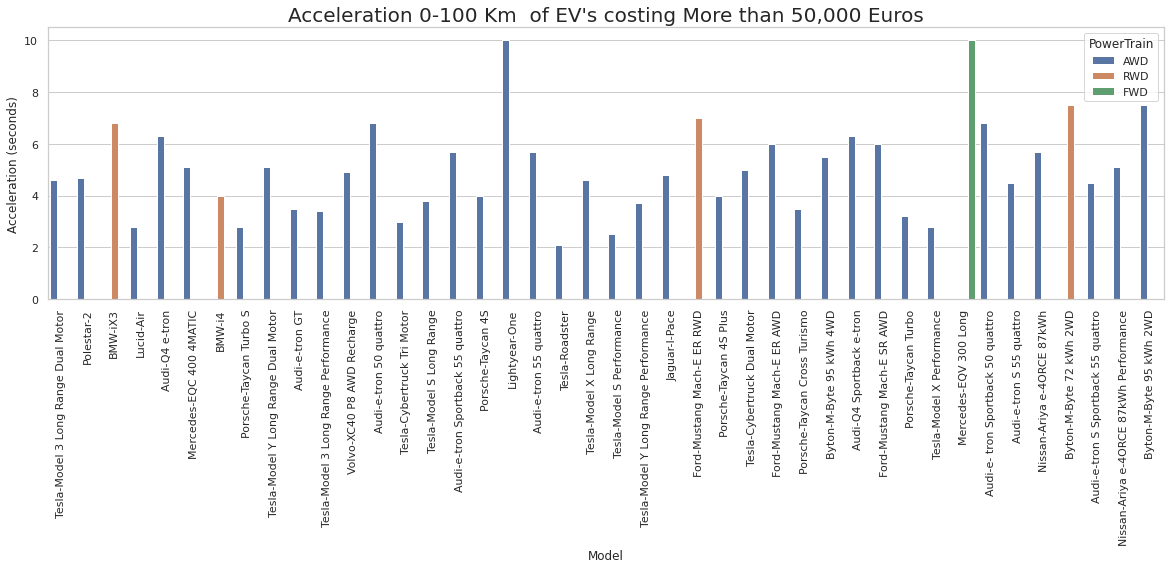

In [35]:
acc(df_1, t1)
acc(df_2, t2)

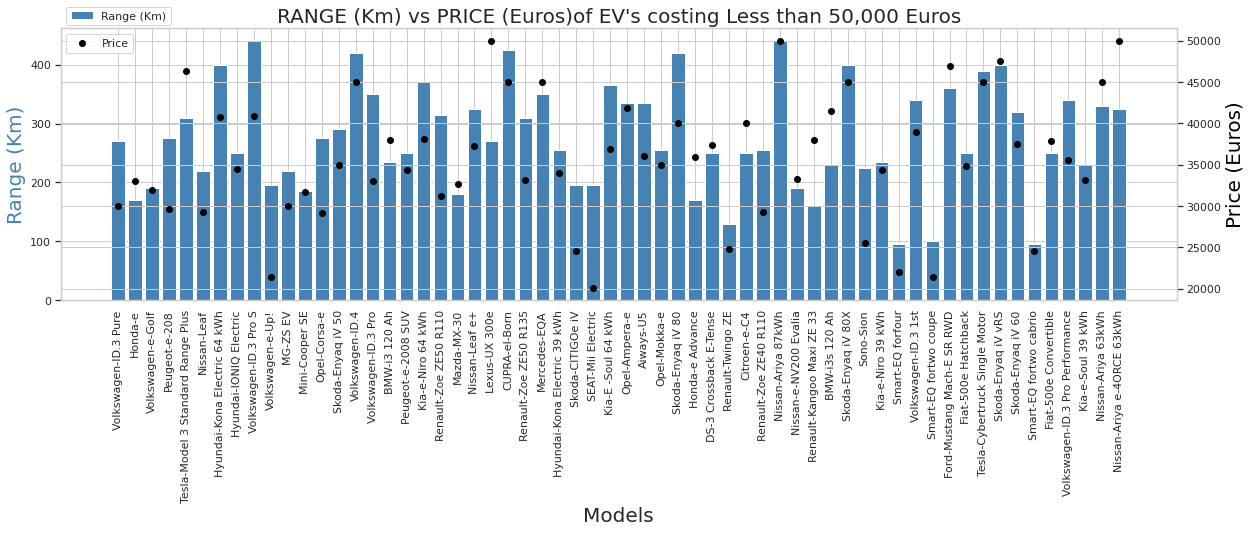

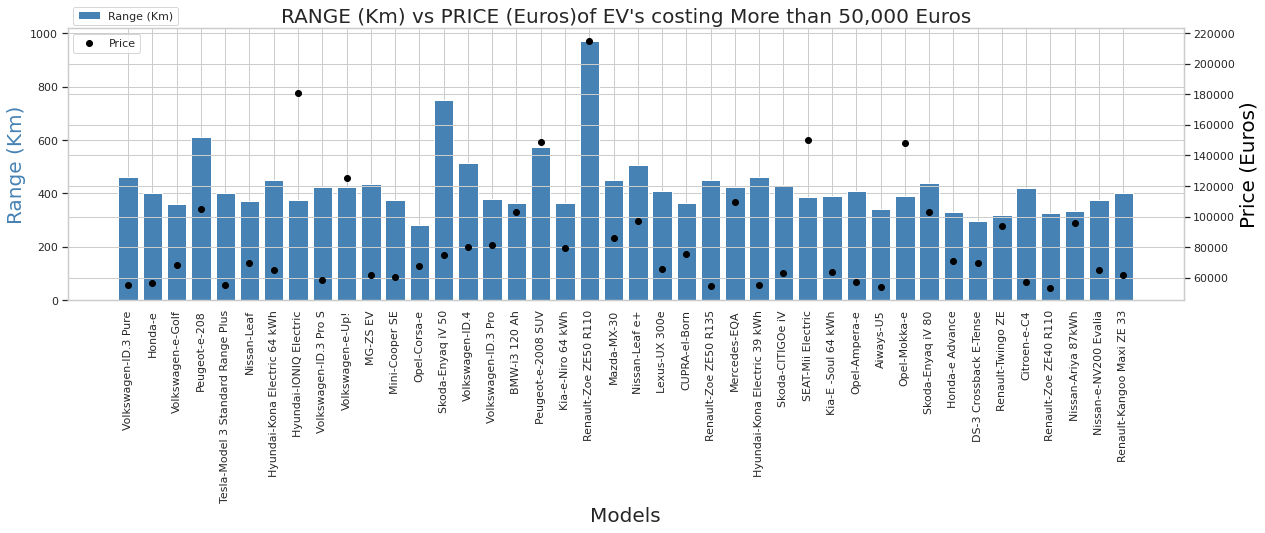

In [36]:
range_price(df_1, t1)
range_price(df_2, t2)

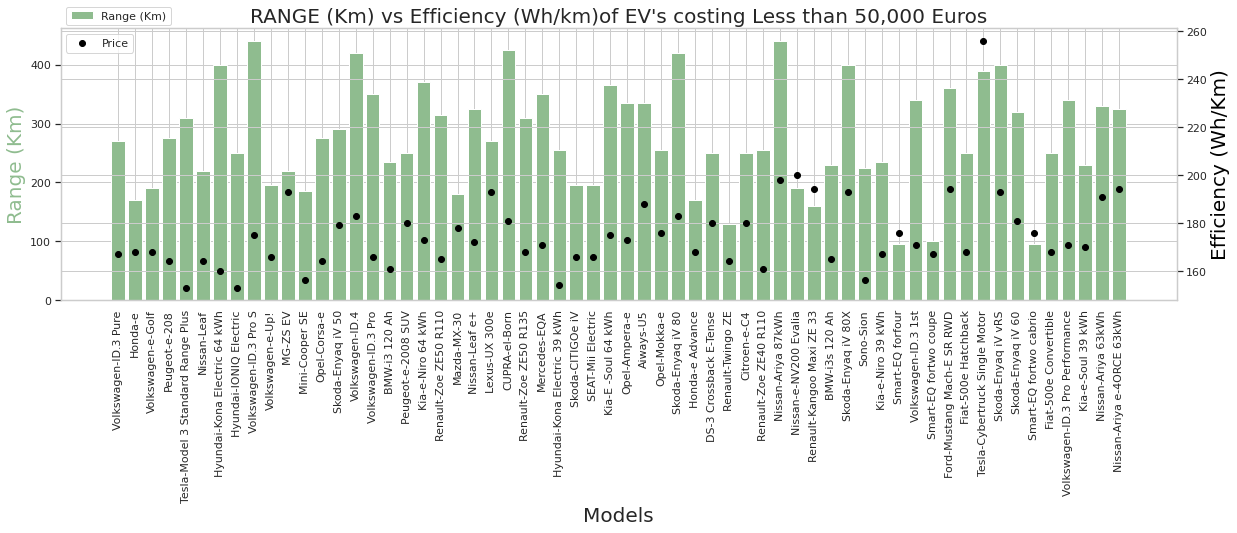

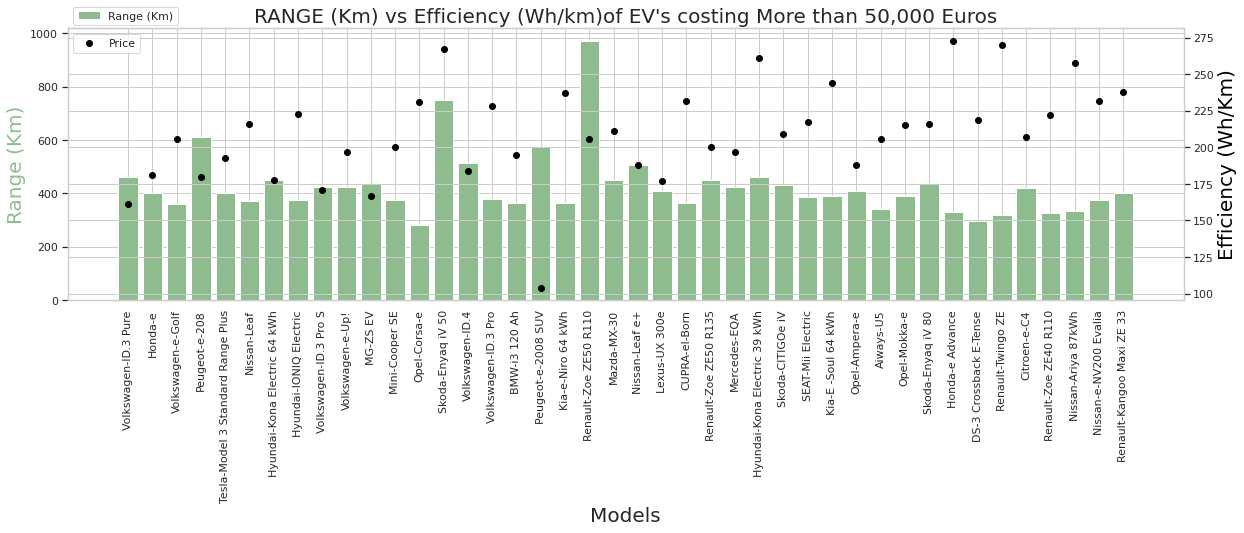

In [37]:
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


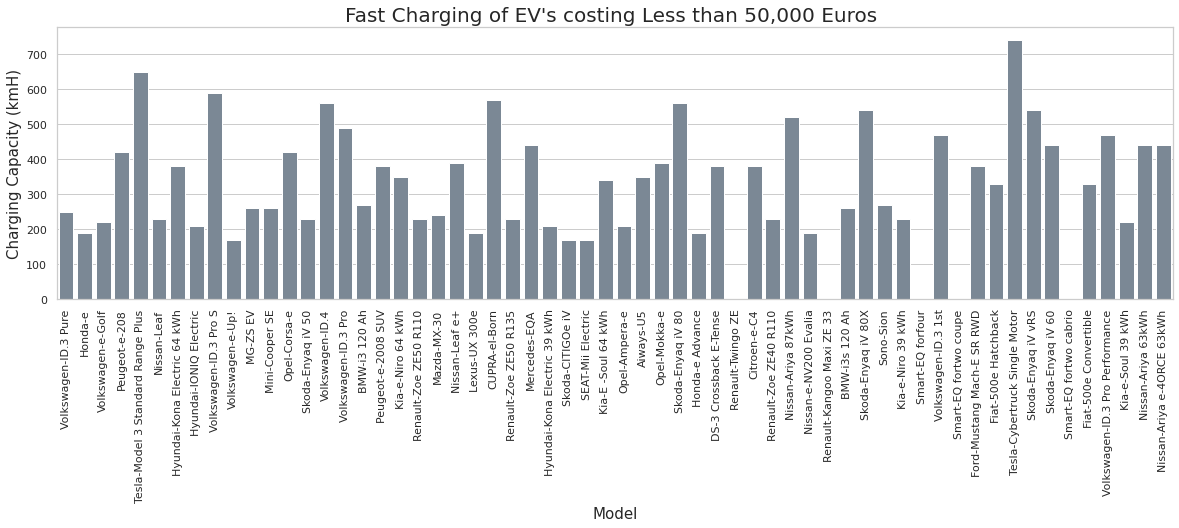

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


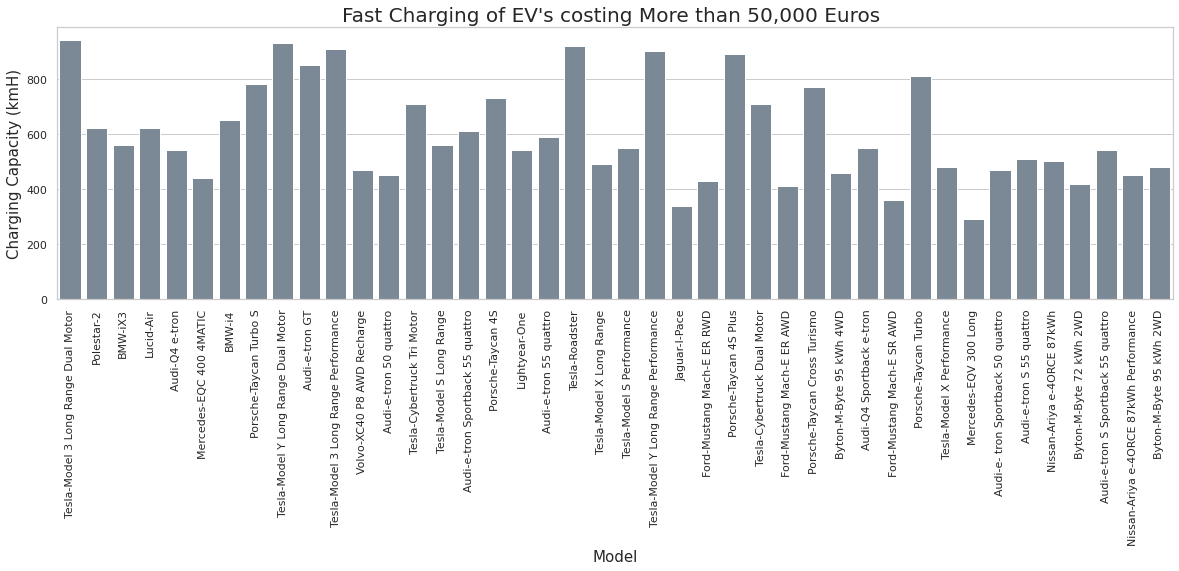

In [38]:
fastcharge(df_1, t1)
fastcharge(df_2, t2)

In [39]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                             FullName  Range_Km  Battery_Pack Kwh  PriceEuro  \
62                 Nissan-Ariya 87kWh       440              87.0      50000   
15              Volkswagen-ID.3 Pro S       440              77.0      40936   
37                      CUPRA-el-Born       425              77.0      45000   
25                    Volkswagen-ID.4       420              77.0      45000   
53                  Skoda-Enyaq iV 80       420              77.0      40000   
12       Hyundai-Kona Electric 64 kWh       400              64.0      40795   
71                 Skoda-Enyaq iV 80X       400              77.0      45000   
88                 Skoda-Enyaq iV vRS       400              77.0      47500   
86      Tesla-Cybertruck Single Motor       390             100.0      45000   
31                  Kia-e-Niro 64 kWh       370              64.0      38105   
45                 Kia-E -Soul 64 kWh       365              64.0      36837   
83         Ford-Mustang Mach-E SR RWD   

In [40]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

                                   FullName  Range_Km  Battery_Pack Kwh  \
51                           Tesla-Roadster       970             200.0   
33               Tesla-Cybertruck Tri Motor       750             200.0   
5                                 Lucid-Air       610             110.0   
48                            Lightyear-One       575              60.0   
40                 Tesla-Model S Long Range       515              90.0   
59                Tesla-Model S Performance       505              90.0   
67              Tesla-Cybertruck Dual Motor       460             120.0   
0       Tesla-Model 3 Long Range Dual Motor       460              70.0   
54                 Tesla-Model X Long Range       450              90.0   
13                                   BMW-i4       450              80.0   
64               Ford-Mustang Mach-E ER RWD       450              88.0   
81                Tesla-Model X Performance       440              90.0   
24     Tesla-Model 3 Long

In [41]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                             FullName  AccelSec  Range_Km PowerTrain  \
39                       Mercedes-EQA       5.0       350        AWD   
8   Tesla-Model 3 Standard Range Plus       5.6       310        RWD   
99         Nissan-Ariya e-4ORCE 63kWh       5.9       325        AWD   
88                 Skoda-Enyaq iV vRS       6.2       400        AWD   
37                      CUPRA-el-Born       6.5       425        RWD   
83         Ford-Mustang Mach-E SR RWD       6.6       360        RWD   
70                     BMW-i3s 120 Ah       6.9       230        RWD   
86      Tesla-Cybertruck Single Motor       7.0       390        RWD   
71                 Skoda-Enyaq iV 80X       7.0       400        AWD   
28                      BMW-i3 120 Ah       7.3       235        RWD   
19                     Mini-Cooper SE       7.3       185        FWD   
35                     Nissan-Leaf e+       7.3       325        FWD   
80                Volkswagen-ID.3 1st       7.3       340       

In [42]:
pd.set_option('display.max_columns', None)
acceleration_2 = df_2.sort_values(by= 'AccelSec')
print(acceleration_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                                   FullName  AccelSec  Range_Km PowerTrain  \
51                           Tesla-Roadster       2.1       970        AWD   
59                Tesla-Model S Performance       2.5       505        AWD   
5                                 Lucid-Air       2.8       610        AWD   
81                Tesla-Model X Performance       2.8       440        AWD   
16                   Porsche-Taycan Turbo S       2.8       375        AWD   
33               Tesla-Cybertruck Tri Motor       3.0       750        AWD   
79                     Porsche-Taycan Turbo       3.2       390        AWD   
24     Tesla-Model 3 Long Range Performance       3.4       435        AWD   
23                           Audi-e-tron GT       3.5       425        AWD   
72             Porsche-Taycan Cross Turismo       3.5       385        AWD   
61     Tesla-Model Y Long Range Performance       3.7       410        AWD   
40                 Tesla-Model S Long Range       3.8       515 

In [43]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Brand
Tesla         13
Audi           9
Volkswagen     8
Nissan         8
Skoda          6
Renault        5
Porsche        5
BMW            4
Kia            4
Ford           4
Opel           3
Smart          3
Byton          3
Hyundai        3
Mercedes       3
Fiat           2
Honda          2
Peugeot        2
DS             1
Citroen        1
CUPRA          1
Volvo          1
MG             1
Jaguar         1
Lexus          1
Lightyear      1
Lucid          1
Mazda          1
Mini           1
Polestar       1
SEAT           1
Sono           1
Aiways         1
Name: Model, dtype: int64


In [44]:
pd.set_option('display.max_columns', None)
eff = df.sort_values(by= 'Efficiency_WhKm')
print(eff[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

                              FullName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh  PriceEuro  
48   

In [45]:
Electric_Vehicle_Clean = pd.read_csv('ElectricCarData_Clean.csv')

In [47]:
Electric_Vehicle_Clean.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [49]:
print(Electric_Vehicle_Clean.dtypes)

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object


In [50]:
EV_clean_1=Electric_Vehicle_Clean[:]

In [51]:
EV_clean_1.RapidCharge=pd.get_dummies(EV_clean_1.RapidCharge,dummy_na=True)
EV_clean_1.PowerTrain=pd.get_dummies(EV_clean_1.PowerTrain,dummy_na=True)
EV_clean_1.PlugType=pd.get_dummies(EV_clean_1.PlugType,dummy_na=True)
EV_clean_1.BodyStyle=pd.get_dummies(EV_clean_1.BodyStyle,dummy_na=True)
EV_clean_1.Segment=pd.get_dummies(EV_clean_1.Segment,dummy_na=True)

In [52]:
EV_clean_1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,0,1,0,0,0,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,0,0,0,0,5,30000
2,Polestar,2,4.7,210,400,181,620,0,1,0,0,0,5,56440
3,BMW,iX3,6.8,180,360,206,560,0,0,0,0,0,5,68040
4,Honda,e,9.5,145,170,168,190,0,0,0,0,0,4,32997


In [54]:
print(Electric_Vehicle_Clean.dtypes)

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object


In [56]:
count_nan_in_df = EV_clean_1.isnull().sum()
print(count_nan_in_df)

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


###.astype('category') to convert object based variable to categorical variabl

In [57]:
EV_clean_1["RapidCharge"]=EV_clean_1["RapidCharge"].astype('category')
EV_clean_1["PowerTrain"]=EV_clean_1["PowerTrain"].astype('category')
EV_clean_1["PlugType"]=EV_clean_1["PlugType"].astype('category')
EV_clean_1["BodyStyle"]=EV_clean_1["BodyStyle"].astype('category')
EV_clean_1["Segment"]=EV_clean_1["Segment"].astype('category')
EV_clean_1["PowerTrain"]=EV_clean_1["PowerTrain"].astype('category')
EV_clean_1['FastCharge_KmH'] = pd.to_numeric(EV_clean_1['FastCharge_KmH'], errors='coerce')

In [58]:
EV_clean_1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,1,0,1,1,1,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,1,1,1,1,1,5,30000
2,Polestar,2,4.7,210,400,181,620.0,1,0,1,1,1,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,1,1,1,1,1,5,68040
4,Honda,e,9.5,145,170,168,190.0,1,1,1,1,1,4,32997


###visualizing Boxplot technique

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


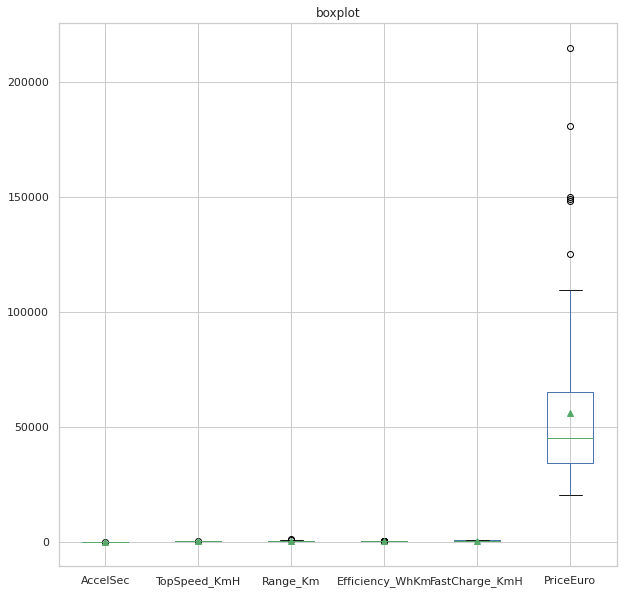

In [59]:
ax = EV_clean_1[['AccelSec', 'TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro']].plot(kind='box',figsize=(10,10), title='boxplot', showmeans=True)
plt.show()

##Analyse the median to know the basic performance of the data

In [60]:
EV_clean_1.median()

AccelSec               7.3
TopSpeed_KmH         160.0
Range_Km             340.0
Efficiency_WhKm      180.0
FastCharge_KmH       440.0
Seats                  5.0
PriceEuro          45000.0
dtype: float64

In [61]:
EV_clean_1.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,98.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,456.734694,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,201.262897,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,275.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,560.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


##Replacement of the outliers with median¶


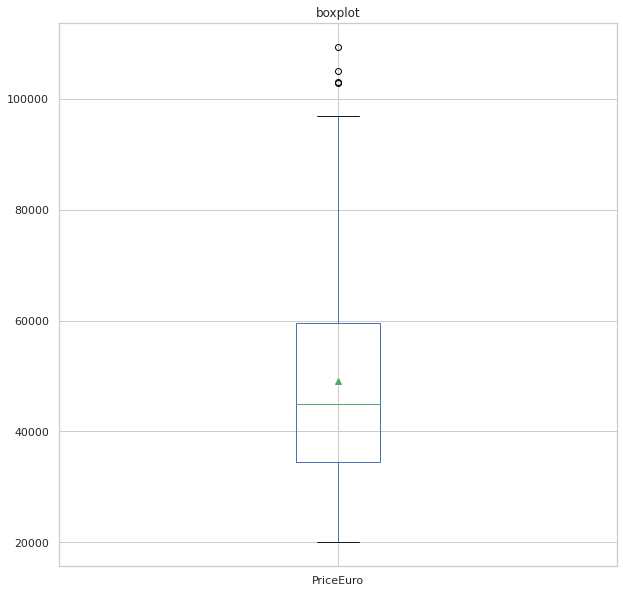

In [62]:
PriceEuro_median=45000
EV_clean_1['PriceEuro']=EV_clean_1['PriceEuro'].mask(EV_clean_1['PriceEuro']>=120000,PriceEuro_median)
ax = EV_clean_1[['PriceEuro']].plot(kind='box',figsize=(10,10), title='boxplot', showmeans=True)
plt.show()

##Knowing the fastest 0-100 acceleration? 

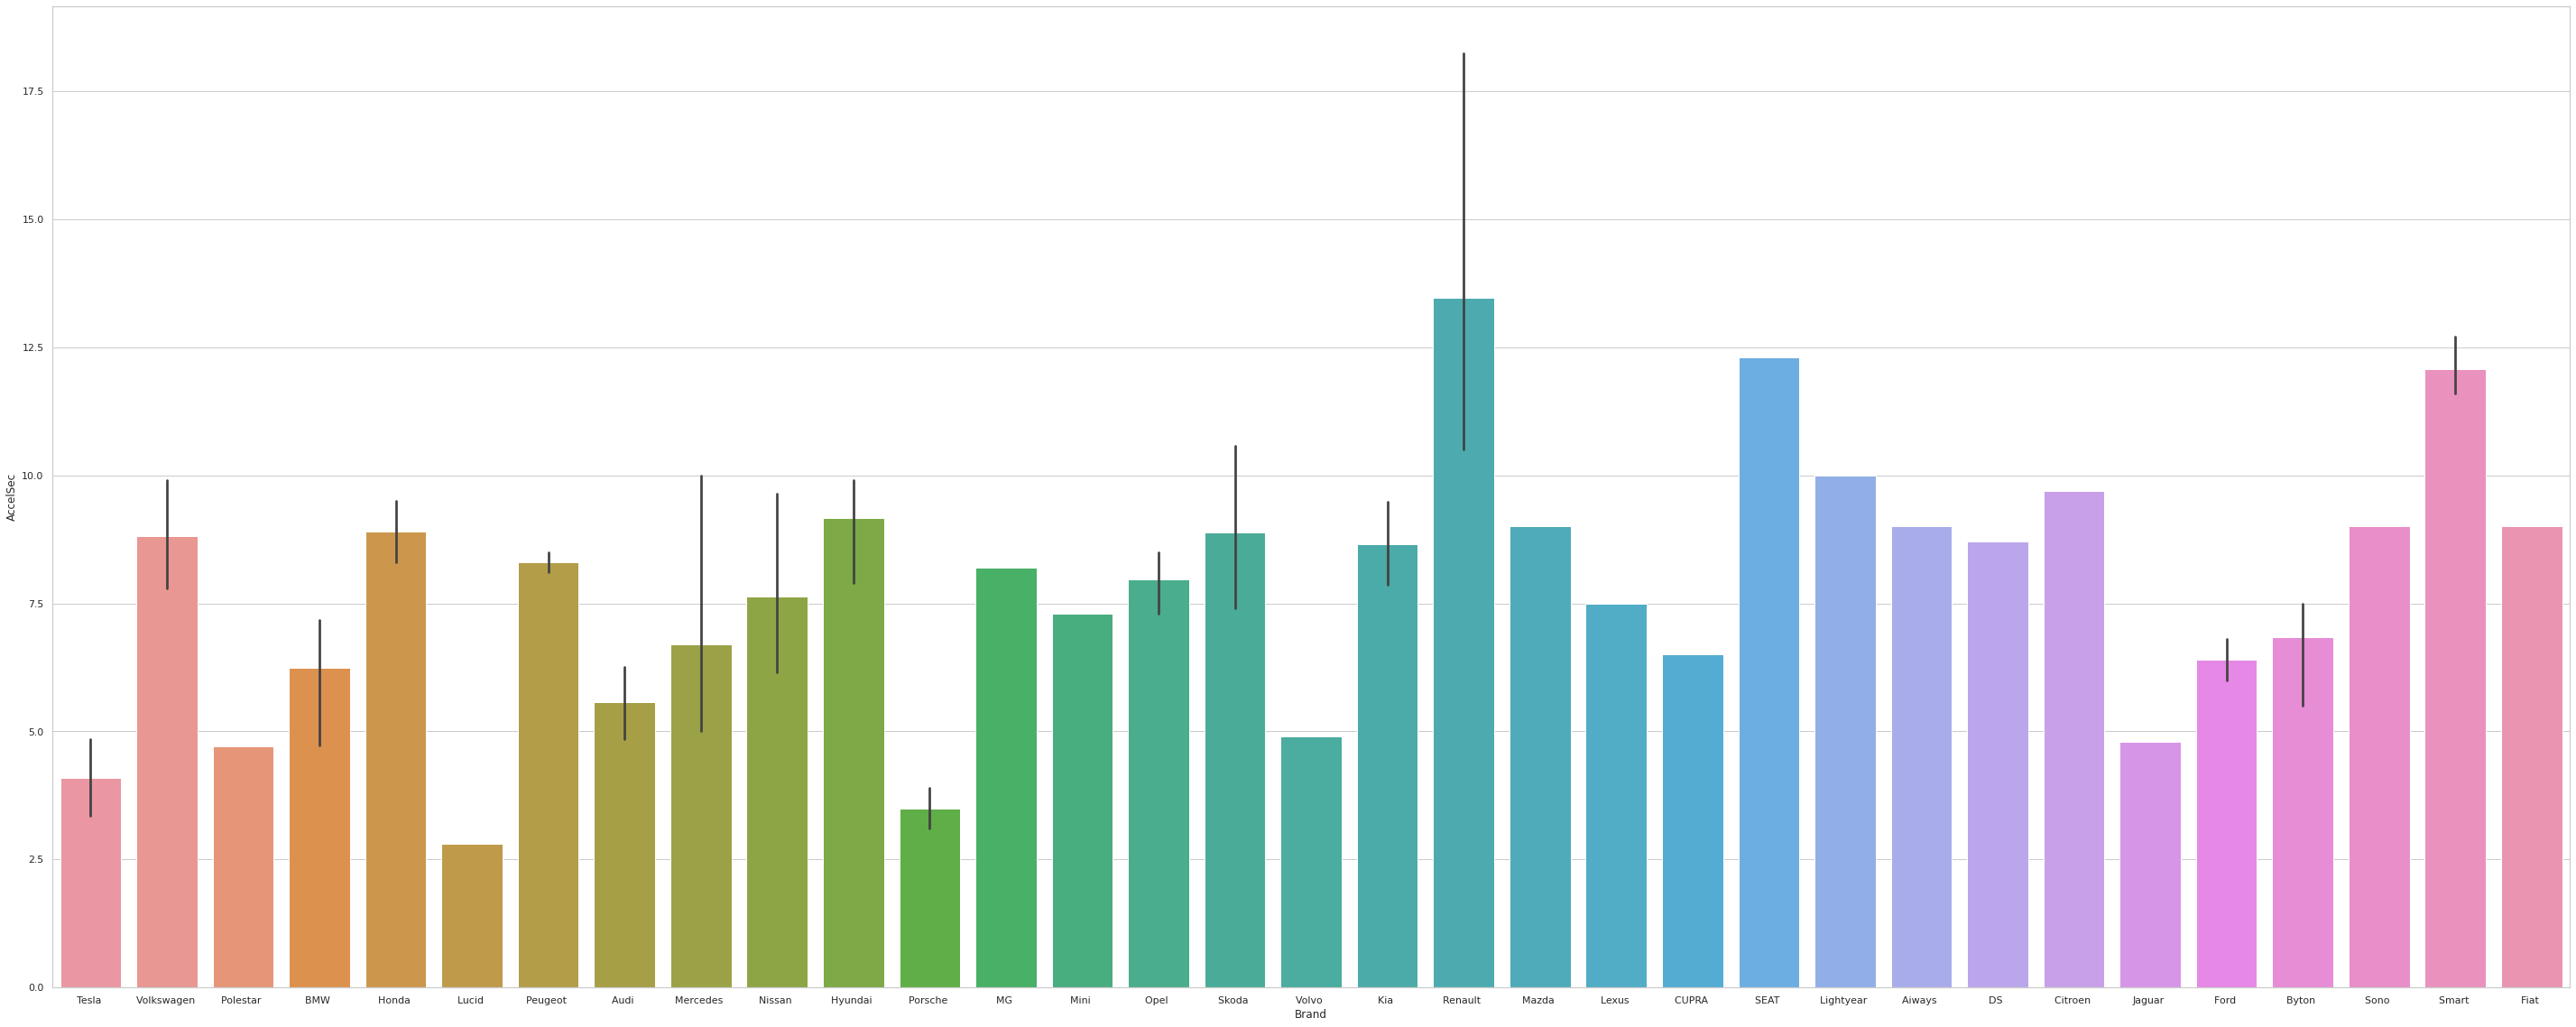

In [65]:
plt.figure(figsize=(50,20))
ax2=sns.barplot(x = 'Brand',
            y = 'AccelSec',
            data = EV_clean_1)

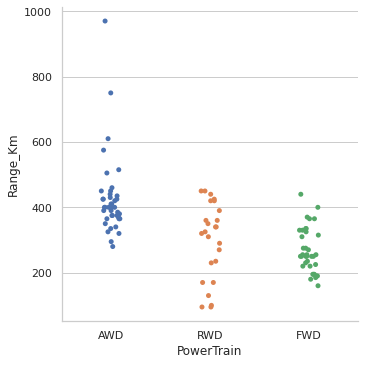

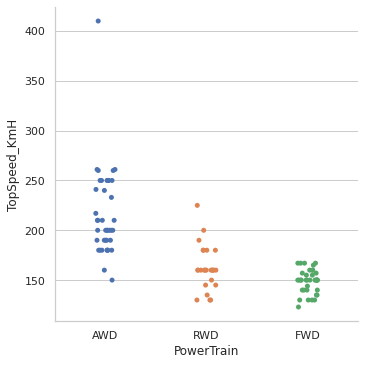

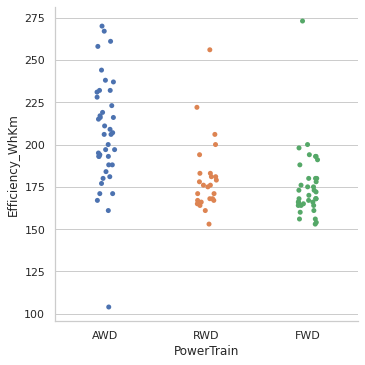

In [67]:
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=Electric_Vehicle_Clean)
sns.catplot(x="PowerTrain", y="TopSpeed_KmH", data=Electric_Vehicle_Clean)
sns.catplot(x="PowerTrain", y="Efficiency_WhKm", data=Electric_Vehicle_Clean)
plt.close(1)

##Which manufacturer has the most number of vehicle.

In [69]:
(Electric_Vehicle_Clean[["Brand","Model"]].describe())

,Brand,Model
count,103,103
unique,33,102
top,Tesla,e-Soul 64 kWh
freq,13,2


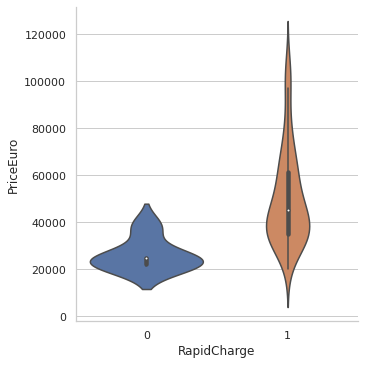

In [70]:
ax2 = sns.catplot(x="RapidCharge", y="PriceEuro", data = EV_clean_1, kind="violin")

##Finding Co-relation (Other analyis)

In [72]:
EV_clean_1.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.768397,-0.175335,-0.661935
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.769719,0.126470,0.635391
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.698120,0.300163,0.539272
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.307342,0.301230,0.581979
FastCharge_KmH,-0.768397,0.769719,0.698120,0.307342,1.000000,0.096641,0.514477
Seats,-0.175335,0.126470,0.300163,0.301230,0.096641,1.000000,0.342572
PriceEuro,-0.661935,0.635391,0.539272,0.581979,0.514477,0.342572,1.000000


# Conclusions

* EV's which cost less have higher acceleration(0-100 Km/Hr) time in order to maximize range
* High performance EV's have lower efficiency
* Most of the vehicles costing less than 50,000 Euros are Front Wheel Drive
* Range of vehicle is proportional to Battery Pack Capacity
* Price of vehicle is proportional battery pack capacity
 Final conclusions:
*Renault has the fastest acceleration with 22.4.
* Mercedes has the highest efficiency with 273.
* Out of the three parameters (range, top speed, efficiency), power range affects the range the maximum.
* Tesla has the maximum number of vehicles having a count of 13.
* After the converting the categorical variable of Rapid charge column with one's and zero's - 0 represents Yes & 1 represents No.
* So Price heavily depends on rapid charging after referring to the catplot.